# --------------------------- Method 1 -------------------------------

In [2]:
#importing required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, degrees 


In [6]:
# Load the image
image_path = r"D:/OpenCV Assignment/2_pencils.jpg"

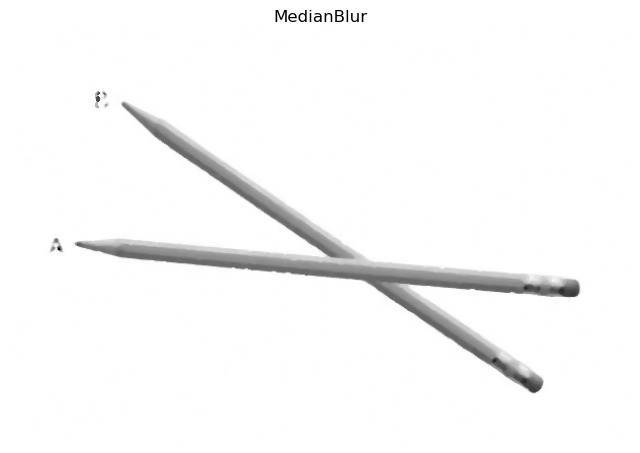

In [8]:
# Applying the MedianBlur to remove the nosie
image = cv2.medianBlur(image, 5)

# Display the MedianBlur image using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(image, cmap='gray') 
plt.title('MedianBlur')
plt.axis('off')
plt.show()

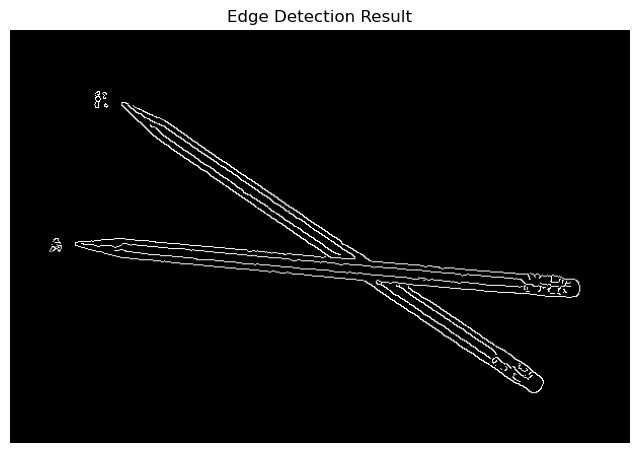

In [9]:
# Apply edge detection to the medianBlur Image
edges = cv2.Canny(image, 30, 150, apertureSize=3)

# Display the edges image using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection Result')
plt.axis('off')
plt.show()


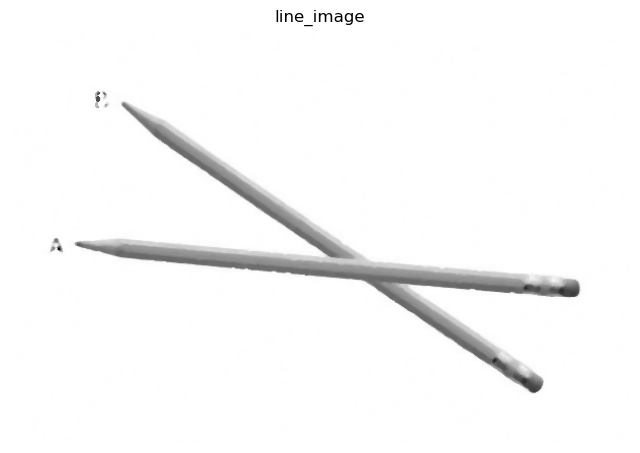

In [11]:
# Detect lines using Hough Line Transform
# hough lines is used to draw the lines through the pencils
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=280, minLineLength=100, maxLineGap=20)

# Create a copy of the original image to draw lines
line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Display the edges image using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(line_image, cmap='gray')
plt.title('line_image')
plt.axis('off')
plt.show()

In [15]:
# def a function to calculate the length of a line
def line_length(line):
    x1, y1, x2, y2 = line
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

In [16]:
# Draw the lines on the image
if lines is not None:
    lengths = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        lengths.append(line_length(line[0]))
    
    # Sorting the lines 
    lengths = sorted(lengths, reverse=True)[:2]
    longest_lines = sorted(lines, key=lambda x: line_length(x[0]), reverse=True)[:2]

    # Calculate the angle 
    def angle_between_lines(line1, line2):
        x1, y1, x2, y2 = line1[0]
        x3, y3, x4, y4 = line2[0]
        angle1 = atan2(y2 - y1, x2 - x1)
        angle2 = atan2(y4 - y3, x4 - x3)
        return abs(degrees(angle1 - angle2))
    
    angle = angle_between_lines(longest_lines[0], longest_lines[1])
else:
    lengths = []
    angle = None

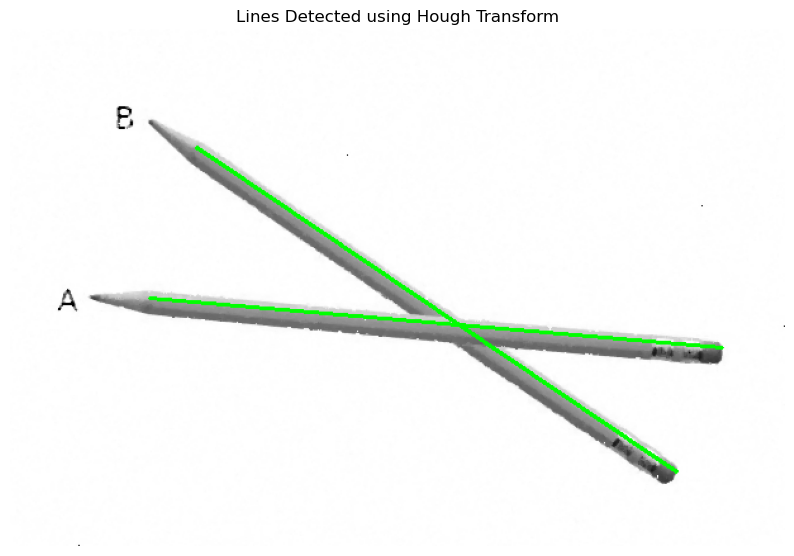

Lengths of the pencils: [457.3587213555679, 453.67940222143653]
Angle between the pencils: 29.106072266596012


In [17]:
# Display the image with lines using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Lines Detected using Hough Transform')
plt.axis('off')
plt.show()

print("Lengths of the pencils:", lengths)
print("Angle between the pencils:", angle)


#  ---------------------------------Method 2 ---------------------------------

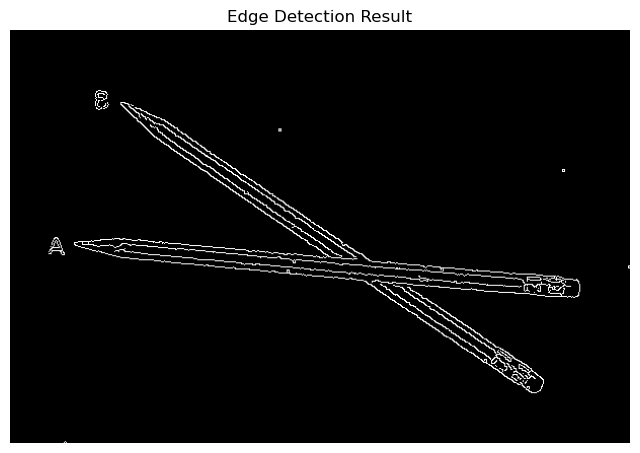

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import atan2, degrees 

# Load the image
image_path = r"D:/OpenCV Assignment/2_pencils.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

#applying the medianBlur to remove the nosie
image = cv2.medianBlur(image, 3)

# apply edge detection
edges = cv2.Canny(image, 50, 150, apertureSize=3)  # Adjusted edge detection parameters

# display the edges image using Matplotlib
plt.figure(figsize=(8, 6))
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection Result')
plt.axis('off')
plt.show()

In [19]:
# Detect lines using Hough Line Transform
lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=50, maxLineGap=20)

# Create a copy of the original image to draw lines
line_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Function to calculate the length of a line (assuming 1 px = 0.1 mm)
def line_length(line):
    x1, y1, x2, y2 = line
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2) * 0.1  # Convert length to mm

In [21]:
# Draw the lines on the image and collect lengths
lengths = []
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(line_image, (x1, y1), (x2, y2), (0, 255, 0), 2)
        lengths.append(line_length(line[0]))

    # Sorting lines
    sorted_lines = sorted(lines, key=lambda x: line_length(x[0]), reverse=True)
    longest_lines = sorted_lines[:2]

    # Calculate the angles
    def angle_between_lines(line1, line2):
        x1, y1, x2, y2 = line1[0]
        x3, y3, x4, y4 = line2[0]
        angle1 = atan2(y2 - y1, x2 - x1)
        angle2 = atan2(y4 - y3, x4 - x3)
        return abs(degrees(angle1 - angle2))

    if len(longest_lines) >= 2:
        angle = angle_between_lines(longest_lines[0], longest_lines[1])
    else:
        angle = None
        
    
    # Highlight the intersection region 
    if len(longest_lines) >= 2:
        x1, y1, x2, y2 = longest_lines[0][0]
        x3, y3, x4, y4 = longest_lines[1][0]

        # Calculate intersection polygon
        intersection_pts = cv2.fitLine(np.array([(x1, y1), (x2, y2), (x3, y3), (x4, y4)]), cv2.DIST_L2, 0, 0.01, 0.01)
        vx, vy, x0, y0 = intersection_pts
        slope = vy / vx
        y_intercept = y0 - slope * x0

        # Determine polygon points
        x_min = min(x1, x2, x3, x4)
        x_max = max(x1, x2, x3, x4)
        y_min = int(slope * x_min + y_intercept)
        y_max = int(slope * x_max + y_intercept)

        intersection_polygon = np.array([[x_min, y_min], [x_max, y_max], [x3, y3], [x4, y4]])

        # Draw polygon on the line image
        cv2.polylines(line_image, [intersection_polygon], isClosed=True, color=(0, 0, 255), thickness=2)

else:
    lengths = []
    angle = None


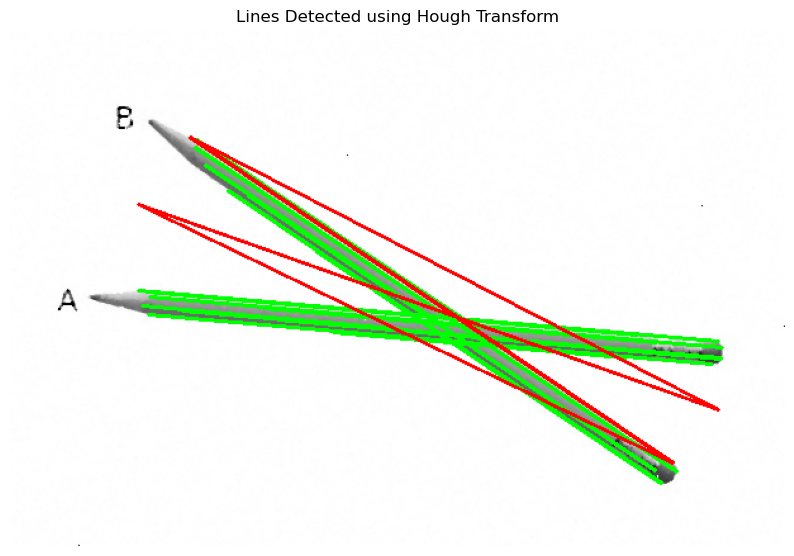

Length of pencil A: 45.81877344495376
Length of pencil B: 45.957589144775646
Angle between the pencils: 29.00993339025431


In [22]:
# Display the image with lines and intersection highlighted using Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Lines Detected using Hough Transform')
plt.axis('off')
plt.show()

print("Length of pencil A:", lengths[0] if len(lengths) > 0 else "Not detected")
print("Length of pencil B:", lengths[1] if len(lengths) > 1 else "Not detected")
print("Angle between the pencils:", angle if angle is not None else "Not detected")

# ----------------------------------- Method 3 ---------------------------------

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = r"D:/OpenCV Assignment/2_pencils.jpg"
image = cv2.imread(image_path)

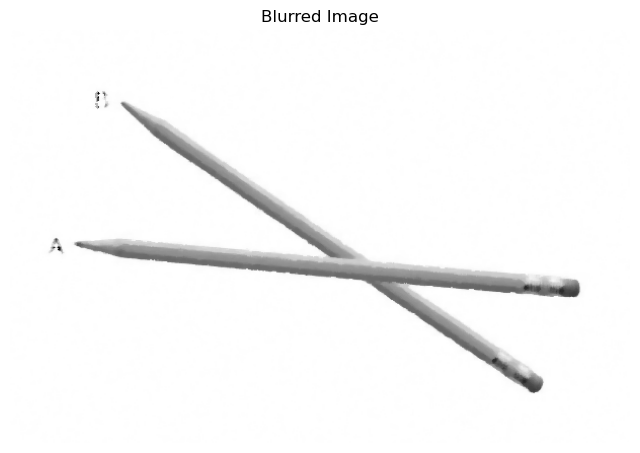

In [25]:

# Apply median blur to the image
blurred = cv2.medianBlur(image, 5)

# Display the blurred image
plt.figure(figsize=(8, 6))
plt.imshow(cv2.cvtColor(blurred, cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')
plt.show()

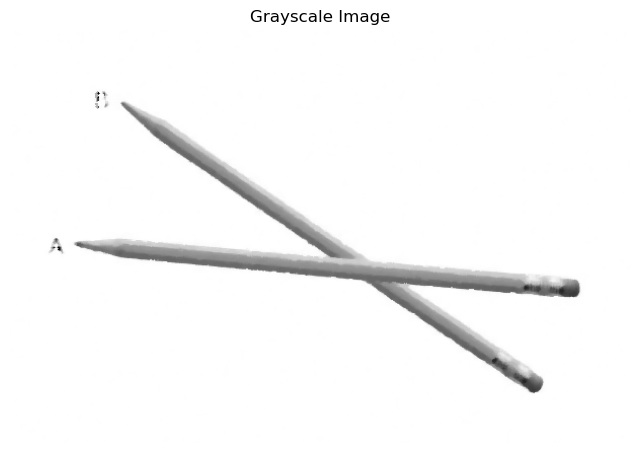

In [26]:
# Convert the blurred image to grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Display the grayscale image
plt.figure(figsize=(8, 6))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')
plt.show()

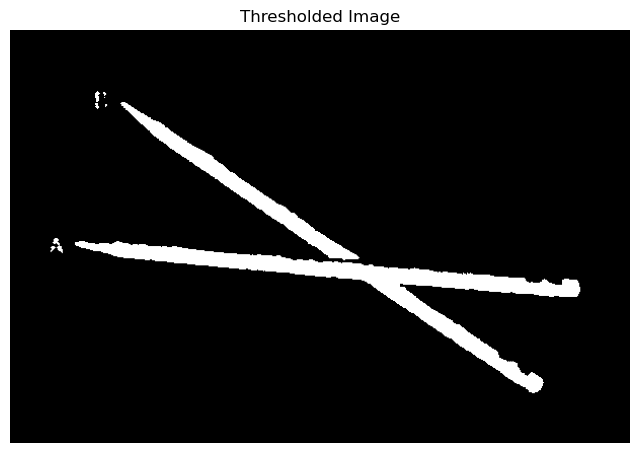

In [27]:
# Thresholding to separate pencils from background
_, thresh = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)

# Display the thresholded image
plt.figure(figsize=(8, 6))
plt.imshow(thresh, cmap='gray')
plt.title('Thresholded Image')
plt.axis('off')
plt.show()

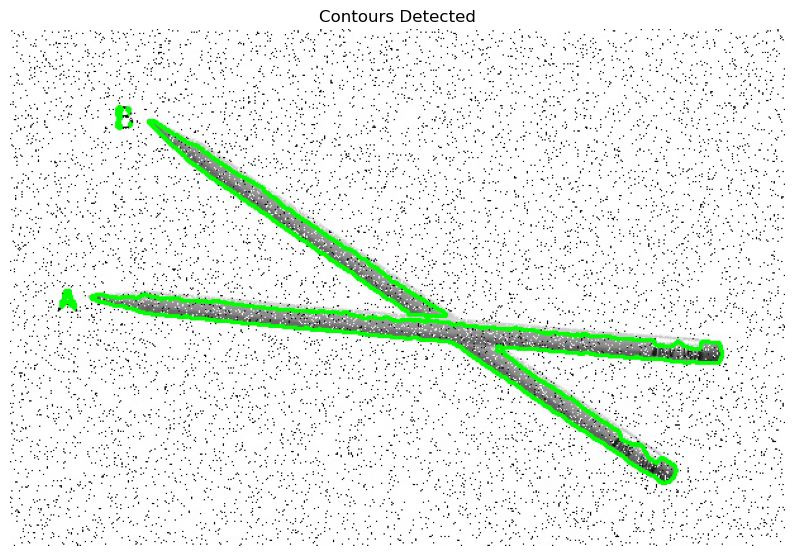

In [28]:
# Find contours of pencils
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Display the image with detected contours
contour_image = np.copy(image)
cv2.drawContours(contour_image, contours, -1, (0, 255, 0), 2)

plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(contour_image, cv2.COLOR_BGR2RGB))
plt.title('Contours Detected')
plt.axis('off')
plt.show()

In [29]:
# Create copy of the original image for drawing
line_image = image.copy()

# def function to calculate the length of a contour (assuming 1 px = 0.1 mm)
def contour_length(contour):
    x, y, w, h = cv2.boundingRect(contour)
    return max(w, h) * 0.1  # Use the maximum dimension of the bounding box as length

# Draw contours and measure lengths
lengths = []
for contour in contours:
    cv2.drawContours(line_image, [contour], -1, (0, 255, 0), 2)
    length = contour_length(contour)
    lengths.append(length)

In [30]:
if len(lengths) >= 2:
    # Sort lengths in descending order and keep the two longest
    lengths_sorted = sorted(lengths, reverse=True)
    longest_lengths = lengths_sorted[:2]


    longest_contours = []
    for length in longest_lengths:
        for contour in contours:
            if contour_length(contour) == length:
                longest_contours.append(contour)
                break

    # Calculate the angles
    def angle_between_contours(contour1, contour2):
        rect1 = cv2.minAreaRect(contour1)
        rect2 = cv2.minAreaRect(contour2)
        angle1 = rect1[2]
        angle2 = rect2[2]
        return abs(angle1 - angle2)

    angle = angle_between_contours(longest_contours[0], longest_contours[1])
else:
    angle = None


In [33]:

# Highlight the intersection region 
if len(longest_contours) >= 2:
    # Get bounding boxes of the two longest contours
    x1, y1, w1, h1 = cv2.boundingRect(longest_contours[0])
    x2, y2, w2, h2 = cv2.boundingRect(longest_contours[1])

    # Calculate intersection region
    intersection_x = max(x1, x2)
    intersection_y = max(y1, y2)
    intersection_w = min(x1 + w1, x2 + w2) - intersection_x
    intersection_h = min(y1 + h1, y2 + h2) - intersection_y

    # Draw rectangle around intersection region
   # cv2.rectangle(line_image, (intersection_x, intersection_y), (intersection_x + intersection_w, intersection_y + intersection_h), (0, 0, 255), 2)


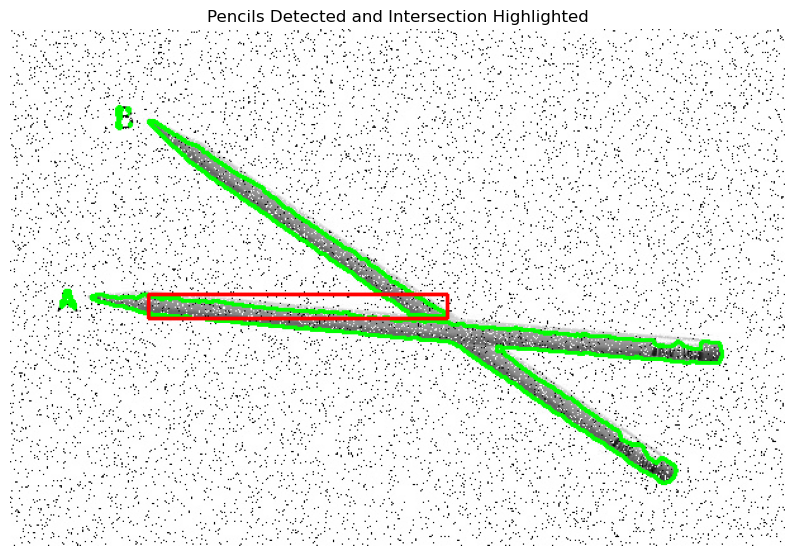

Length of pencil B: 49.900000000000006
Angle between the pencils: 29.659770488739014


In [34]:

# Display the image with contours and intersection highlighted
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(line_image, cv2.COLOR_BGR2RGB))
plt.title('Pencils Detected and Intersection Highlighted')
plt.axis('off')
plt.show()

#print("Length of pencil A:", lengths[0] if len(lengths) > 0 else "Not detected")
print("Length of pencil B:", lengths[1] if len(lengths) > 1 else "Not detected")
print("Angle between the pencils:", angle if angle is not None else "Not detected")
